In [138]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [148]:
kospi_200_items = pd.read_excel('./현대차_한국전력_데이터 (1).xlsx',sheet_name='현대차')

In [149]:
kospi_200_items = kospi_200_items.iloc[1:-3,1:-2]

In [150]:
kospi_200_items.columns

Index(['price', 'price_processed1', 'RSI', 'Average True Range', 'MACD',
       'MACD_processed', 'ma10', 'ma10_processed', 'weight_ma10',
       'weight_ma10_processed', 'Momentum', 'Momentum_processed'],
      dtype='object')

In [152]:
kospi_200_items['price_processed1'] = kospi_200_items['price_processed1'].astype('float64')

In [153]:
kospi_200_items.dtypes

price                      int64
price_processed1         float64
RSI                      float64
Average True Range       float64
MACD                     float64
MACD_processed           float64
ma10                       int64
ma10_processed             int64
weight_ma10              float64
weight_ma10_processed      int64
Momentum                   int64
Momentum_processed         int64
dtype: object

In [156]:
len(kospi_200_items[kospi_200_items['price_processed1']== -1])/len(kospi_200_items['price_processed1'])

0.6056338028169014

In [157]:
cols = ['RSI', 'Average True Range',
       'MACD', 'MACD_processed', 'ma10', 'ma10_processed', 'weight_ma10']

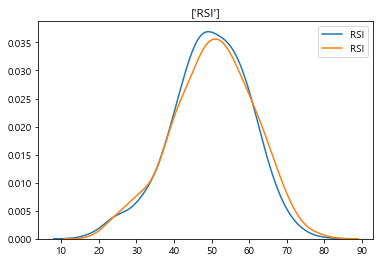

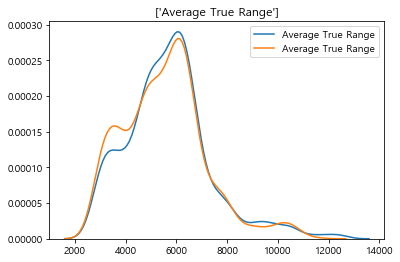

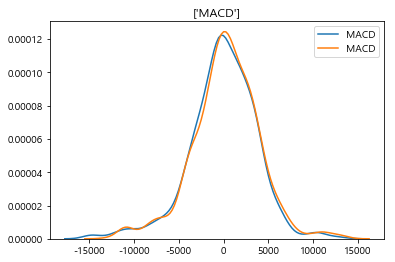

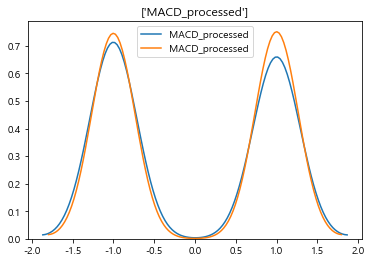

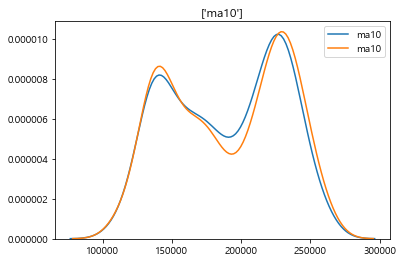

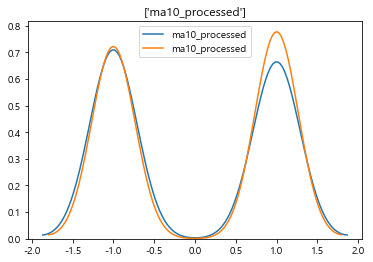

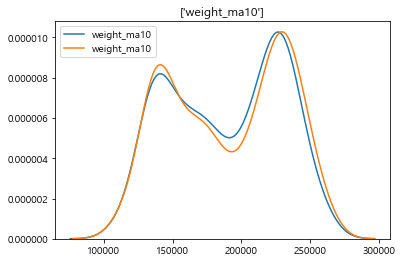

In [159]:
for i in cols:
        sns.kdeplot(data=kospi_200_items[kospi_200_items['price_processed1'] == 1][i])
        sns.kdeplot(data=kospi_200_items[kospi_200_items['price_processed1'] == -1][i])
        plt.title([i])
        plt.show()     

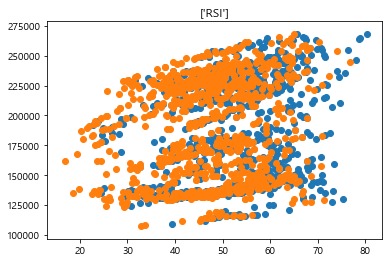

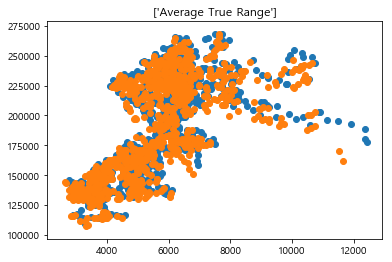

In [24]:
for i in ['RSI', 'Average True Range']:
    plt.scatter(kospi_200_items[kospi_200_items['price_processed'] == 1][i], kospi_200_items[kospi_200_items['price_processed'] == 1]['price'])
    plt.scatter(kospi_200_items[kospi_200_items['price_processed'] == -1][i], kospi_200_items[kospi_200_items['price_processed'] == -1]['price'])
    plt.title([i])
    plt.show()    

In [160]:
from sklearn.linear_model import LogisticRegression

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(kospi_200_items[[
       'RSI','Average True Range','MACD','ma10_processed']] , kospi_200_items['price_processed1'] )


cols = ['RSI','Average True Range','MACD','ma10_processed']


In [163]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1278, 4) (426, 4) (1278,) (426,)


In [87]:
Y_train

1237   -1.0
600    -1.0
334     1.0
430     1.0
292    -1.0
1527   -1.0
770     1.0
528     1.0
559    -1.0
1446    1.0
1440    1.0
90      1.0
404    -1.0
940    -1.0
873    -1.0
157    -1.0
1598    1.0
1245    1.0
1081   -1.0
826     1.0
1557   -1.0
1425   -1.0
1030   -1.0
1265   -1.0
1577   -1.0
562    -1.0
1093   -1.0
1438   -1.0
540     1.0
123    -1.0
       ... 
1004    1.0
1242   -1.0
583    -1.0
565    -1.0
401     1.0
671     1.0
1517    1.0
255     1.0
910     1.0
471    -1.0
917    -1.0
360     1.0
1281   -1.0
1303   -1.0
1205   -1.0
1308    1.0
1417   -1.0
511    -1.0
752    -1.0
1610   -1.0
132     1.0
147    -1.0
963     1.0
850     1.0
1672    1.0
718     1.0
908     1.0
1099    1.0
238     1.0
1064   -1.0
Name: price_processed, Length: 1277, dtype: float64

In [164]:
for col in cols:
    XX_train = X_train[[col]]
    XX_test = X_test[[col]]
    model=LogisticRegression()
    model.fit(XX_train,Y_train)
    prediction7=model.predict(XX_test)
    ##0.5348564733450498 -1 비율
    print('The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction7,Y_test),'\n',metrics.confusion_matrix(Y_test,prediction7))

The accuracy of the LogisticRegression is 0.6455399061032864 
 [[275   0]
 [151   0]]
The accuracy of the LogisticRegression is 0.6455399061032864 
 [[275   0]
 [151   0]]
The accuracy of the LogisticRegression is 0.6455399061032864 
 [[275   0]
 [151   0]]
The accuracy of the LogisticRegression is 0.6455399061032864 
 [[275   0]
 [151   0]]


In [76]:
Y_train.dtypes

dtype('O')

In [165]:
model=LogisticRegression()
model.fit(X_train,Y_train)
prediction7=model.predict(X_test)
print('The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction7,Y_test),'\n',metrics.confusion_matrix(Y_test,prediction7))

The accuracy of the LogisticRegression is 0.647887323943662 
 [[274   1]
 [149   2]]


In [166]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

0.596244131455399


<Figure size 2880x2160 with 0 Axes>

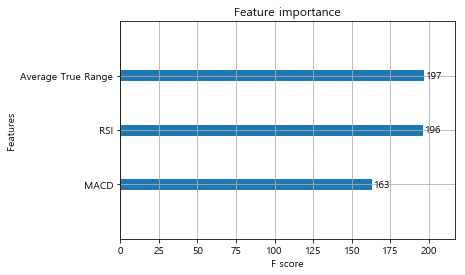

In [169]:
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost

model = XGBClassifier()
model.fit(X_train[['RSI','Average True Range','MACD']],Y_train)
plt.figure(figsize=(40,30))
plot_importance(model)
# plt.show()
a = model.predict(X_test[['RSI','Average True Range','MACD']])
print(metrics.accuracy_score(a,Y_test))

In [47]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)

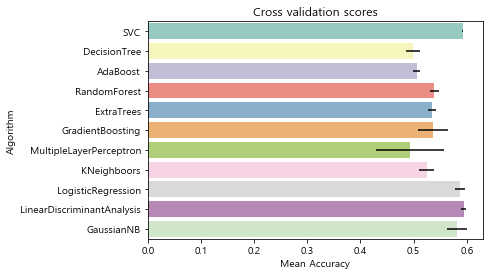

In [170]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'GaussianNB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [171]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('LR',LogisticRegression(C=0.0001)),
                                              ('LDA', LinearDiscriminantAnalysis()),
                                              ('GBC',GradientBoostingClassifier())], 
                       voting='soft').fit(X_train,Y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,Y_test))
cross=cross_val_score(ensemble_lin_rbf,X_train,Y_train, cv = 3 ,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.647887323943662
The cross validated score is 0.5774797633977011
